## Интернет-магазин компьютерных игр - анализ популярности игр

Магазин видео игр продает игры по всему миру.

Из открытых источников выгружены исторические данные с:
- наименованиями игр, 
- годом выпуска,  
- продажами игр в разных регионах, 
- оценками пользователей и экспертов, 
- жанрами,
- игровыми платформами (например, Xbox или PlayStation), 
- возрастным рейтингом  ESRB (Entertainment Software Rating Board). 

ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, E - игры для всех, EC - для детей младшего возраста, Т - для подростков, М - для взрослых 17+, АО - только для взрослых 18+ и некоторые другие. 

У нас данные до 2016 года. Представим, что сейчас декабрь 2016 г., и магазин планирует кампанию на 2017-й. Нужно отработать принцип работы с данными. Данные за 2016 год могут быть неполными.

**Цель анализа - выявить определяющие успешность игры закономерности.** Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Исследование пройдёт в несколько этапов:
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных
4. Проверка гипотез.


### 1. Обзор данных

In [1]:
#импортируем библиотеку pandas
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st
#чтобы не появлялись предупреждения
import warnings
warnings.simplefilter("ignore")

In [2]:
#открываем файлы и записываем в переменные
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


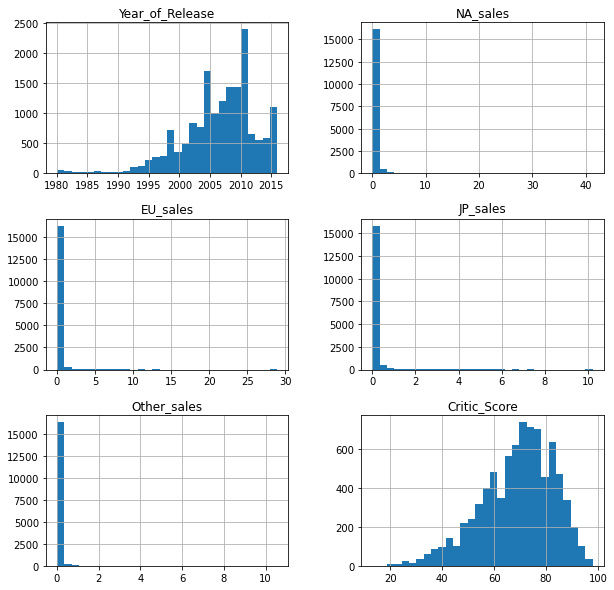

In [6]:
games.hist(figsize=(10, 10), bins = 30);

#### 1.1 Вывод

Данные даны в одной таблице. В таблице 16715 записей, 11 столбцов (7 из которых с численными данными) с инфо:
- `Name` название игры
- `Platform` название игровой платформы 
- `Year_of_Release` год выхода игры
- `Genre` жанр игры
- `NA_sales` продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

В данных есть пропуски. 

Некорректно проименованы столбцы (не соотвествуют общепринятому стилю).

Для значений года выходы игры и оценки пользователей необходимо изменить тип данных на целочисленный и вещественные числа соответственно.


### 2. Предобработка данных

#### 2.1 Наименования столбцов
Изменим названия столбцов на соответсвующие общепринятому стилю.

In [7]:
games.columns = games.columns.str.lower()

In [8]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 2.2 Пропуски

In [9]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Строки с пропусками в `name`, `genre` и `year_of_release`игры уберем польностью, т.к. их мало и не можем на что-то заменить исходя из имеющихся данных. Без названия, года выпуска и платформы игры строки не особо информативны.

In [10]:
old_games = games

In [11]:
games = games.dropna(subset = ['name', 'genre','year_of_release'])

In [12]:
games.shape[0]

16444

In [13]:
games.shape[0]/old_games.shape[0]

0.9837870176488184

Убрали менее 2% записей в результате удаления пропусков.

Остальные пропуски оставим,их много, не можем просто убрать или заменить на медианы, потому что это возможно приведет к  искажению данных и дальнейших результатов.

Возможные причины пропусков:
- некорректная работа алгоритмов выгрузки данных 
- отсутствие данных в первоисточнике

In [14]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
games.query('user_score == "tbd"').shape[0]

2376

Аббревиатура "tbd" обозначает to be determined, то есть , что оценка пользователей еще не была сформирована на момент выгрузки данных. Получается данные по оценке игры пользователями отсутствуют еще в дополнение к пропускам в 2376 записях. Так как и пропуски, и tbd по факту означают отсутвие оценки, обозначим tbd тоже как nan.

In [16]:
games['user_score'] = games.user_score.mask(games.user_score == "tbd")
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [17]:
games.shape[0]

16444

#### 2.3 Преобразование типов данных

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Преобразуем оценку пользователя в численное значение, чтобы была возможность в дальнейшем оперировать ей как численной переменной - считать численные показатели (среднее, квартили и тд), строить графики.

In [19]:
games['user_score'] = games.user_score.astype('float')

Годы выпуска логично сделать целочисленной переменной.

In [20]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [21]:
games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int32

#### 2.4 Дубликаты

Сделаем проверку на полные дубликаты:

In [22]:
games.duplicated().sum()

0

Полных дубликатов в датасете нет.

Проверим, есть ли неявные дубликаты:
- в жанрах:

In [23]:
games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

- в названиях платформ:

In [24]:
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

- в подстроках с названием игры, годом выпуска и платформой:

In [25]:
games[['name', 'year_of_release', 'platform']].duplicated().sum()

1

In [26]:
games[games[['name', 'year_of_release', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [27]:
games = games.drop_duplicates(subset = ['name', 'year_of_release', 'platform'])
games[['name', 'year_of_release', 'platform']].duplicated().sum()

0

In [28]:
games.shape[0]

16443

Был один дубликат подстроки, удалили его. Количество строк уменьшилось на одну, все ок.

#### 2.5 Добавление колонок

В отдельный столбец занесем данные о суммарных продажах игры.

In [29]:
games['overall_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

In [30]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### 2.6 Вывод

 - Изменили названия столбцов на соответсвующие общепринятому стилю.
 - Удалили записи с пропусками в `year_of_release`, `name` и `genre`. Остальные пропуски оставили, их много, не можем просто убрать или заменить на медианы, потому что это возможно приведет к искажению данных и дальнейших результатов. Причиной пропусков может быть некорректная работа алгоритмов выгрузки данных, что следует сообщить разработчикам, а также отсутсвие тех или иных данных в первоисточнике.
 - Значения в колонке `user_score` преобразовали в тип float, в колонке `year_of_release` в тип int.
 - В колонке с оценкой пользователей кроме пропусков и численных значений, присутвует значение 'tbd' - to be determined, оно обозначает, что оценка пользователей еще не сформировалась, в нашем случае это равноценно пропуску.
 - В отдельный столбец `overall_sales` занесли данные о суммарных продажах игры.
 - Проверили на дубликаты: полных дубликатов не было, был один дубликат в подстроке с названием игры, годом выпуска и платформой, его удалили.

### 3. Исследовательский анализ данных

#### 3.1 Распределение игр по годам

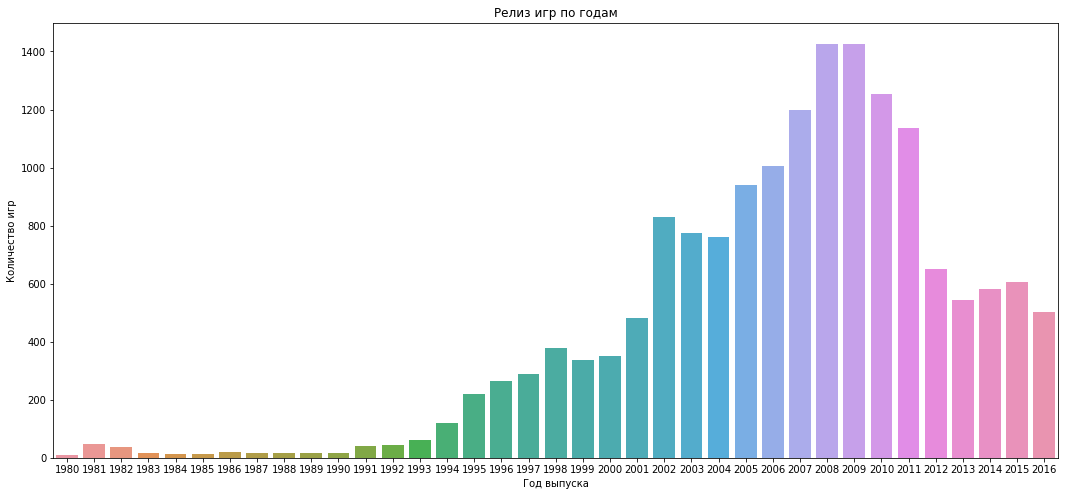

In [31]:
plt.figure(figsize = (18,8))
sns.countplot(data = games, x = games.year_of_release )
plt.title('Релиз игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

In [32]:
games.value_counts('year_of_release').tail()

year_of_release
1987    16
1988    15
1985    14
1984    14
1980     9
dtype: int64

В 1980-е годы выпускалось меньше всего игр. Это связано с тем, что индустрия компьютерных игр только начала развиваться.
Думаю, нам не очень инересны данные с 1980 примерно по 2000 год, т.к. платформы и  игры, которые были популярны тогда, сейчас уже история.

#### 3.2 Продажи игр по платформам

ТОП-5 платформ по продажам игр за все время:

In [33]:
most_popular_platforms = games.pivot_table(index = 'platform', values = 'overall_sales', aggfunc = 'sum').reset_index().sort_values(by='overall_sales', ascending = False).head(5)
most_popular_platforms

,platform,overall_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78


Посмотрим продажи по годам для платформ из ТОП-5:

In [34]:
def plot_sales_per_platform(platform):
    sns.lineplot(x =games.query('platform == @platform').groupby('year_of_release').agg({'overall_sales': 'sum'}).index, 
                 y = games.query('platform == @platform').groupby('year_of_release').agg({'overall_sales': 'sum'}).overall_sales,
                 label= platform)
    plt.title('Продажи игр на прибыльных платформах' )
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи, млн копий')
    plt.legend()
    

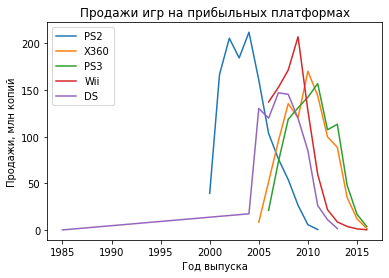

In [35]:
for platform in most_popular_platforms.platform:
    plot_sales_per_platform(platform)

В среднем цикл жизни платформы примерно 10 лет, половину этого времени она набирает популярность, а вторую половину ее популярность снижается почти до нуля.

У платформы DS есть странный  "хвост", который тянется с 1985 года, платформа появилась только в 2004 году. 


In [36]:
games.query('platform == "DS" and year_of_release <2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Удалим эту некорректную запись. 

In [37]:
games = games.drop(games[(games['platform'] == 'DS') & (games['year_of_release'] < 2004)].index)
games.shape[0]

16442

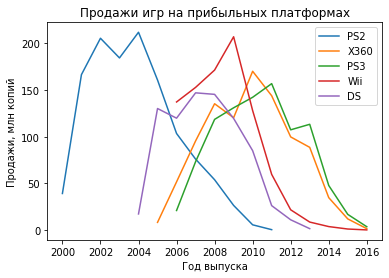

In [38]:
for platform in most_popular_platforms.platform:
    plot_sales_per_platform(platform)

Теперь аномального хвоста нет.

Попробуем получить примерный срок жизни платформы с помощью расчетов:

In [39]:
platform_life = []
for platform in most_popular_platforms.platform:
    value = games[games['platform'] == platform]['year_of_release'].max() - games[games['platform'] == platform]['year_of_release'].min()
    
    platform_life.append(value) 
platform_life_s = pd.Series(platform_life)

In [40]:
platform_life_s.mean()

10.2

Так же получили, что цикл жизни платформы - 10 лет.

**Возьмем данные за последние 3 года  - с 2014 по 2016 гг, чтобы сделать прогнозы для 2017 г.** Т.к. индустрия быстро развивается, быстрее появляются новые платформы, стремительнее устаривают ранее популярные платформы. Проанализировав данные за последние три года, мы сможем найти платформы, находящиеся на пике популярности в настоящий момент и правильно определить потенциально прибыльные игры.

In [41]:
actual_games = games.query('year_of_release>=2014')

In [42]:
actual_games.shape[0]

1689

In [43]:
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  overall_sales    1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


In [44]:
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


Топ-10 платформ по продажам с 2014 по 2016 гг.

In [45]:
pivot_actual_games = actual_games.pivot_table(index = 'platform', values = 'overall_sales', aggfunc = 'sum').reset_index().sort_values(by='overall_sales', ascending = False).head(10)

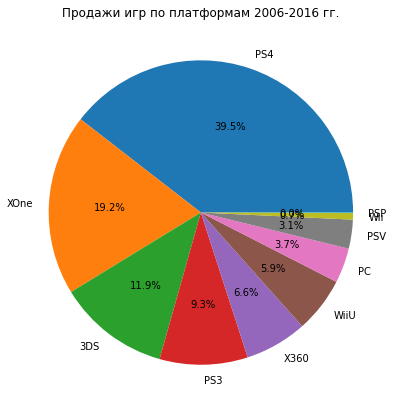

<Figure size 1080x1080 with 0 Axes>

In [46]:
plt.figure(figsize = (7,7))
plt.title('Продажи игр по платформам 2006-2016 гг.')
plt.pie(pivot_actual_games.overall_sales, labels = pivot_actual_games.platform, autopct='%1.1f%%')
plt.figure(figsize = (15,15))
plt.show()

**Наиболее популярными платформами за актуальных период являются PS4, Xone, 3DS, PS3 и некоторые другие платформы, что отображено на круговой диаграмме.**

Потенциально прибыльными платформами будут те, продажи которых растут или еще достаточно высоки на период 2014-2016 гг.

Посмотрим как менялись продажи по годам игр на платформах из ТОП 10 за 2014-2016 гг.

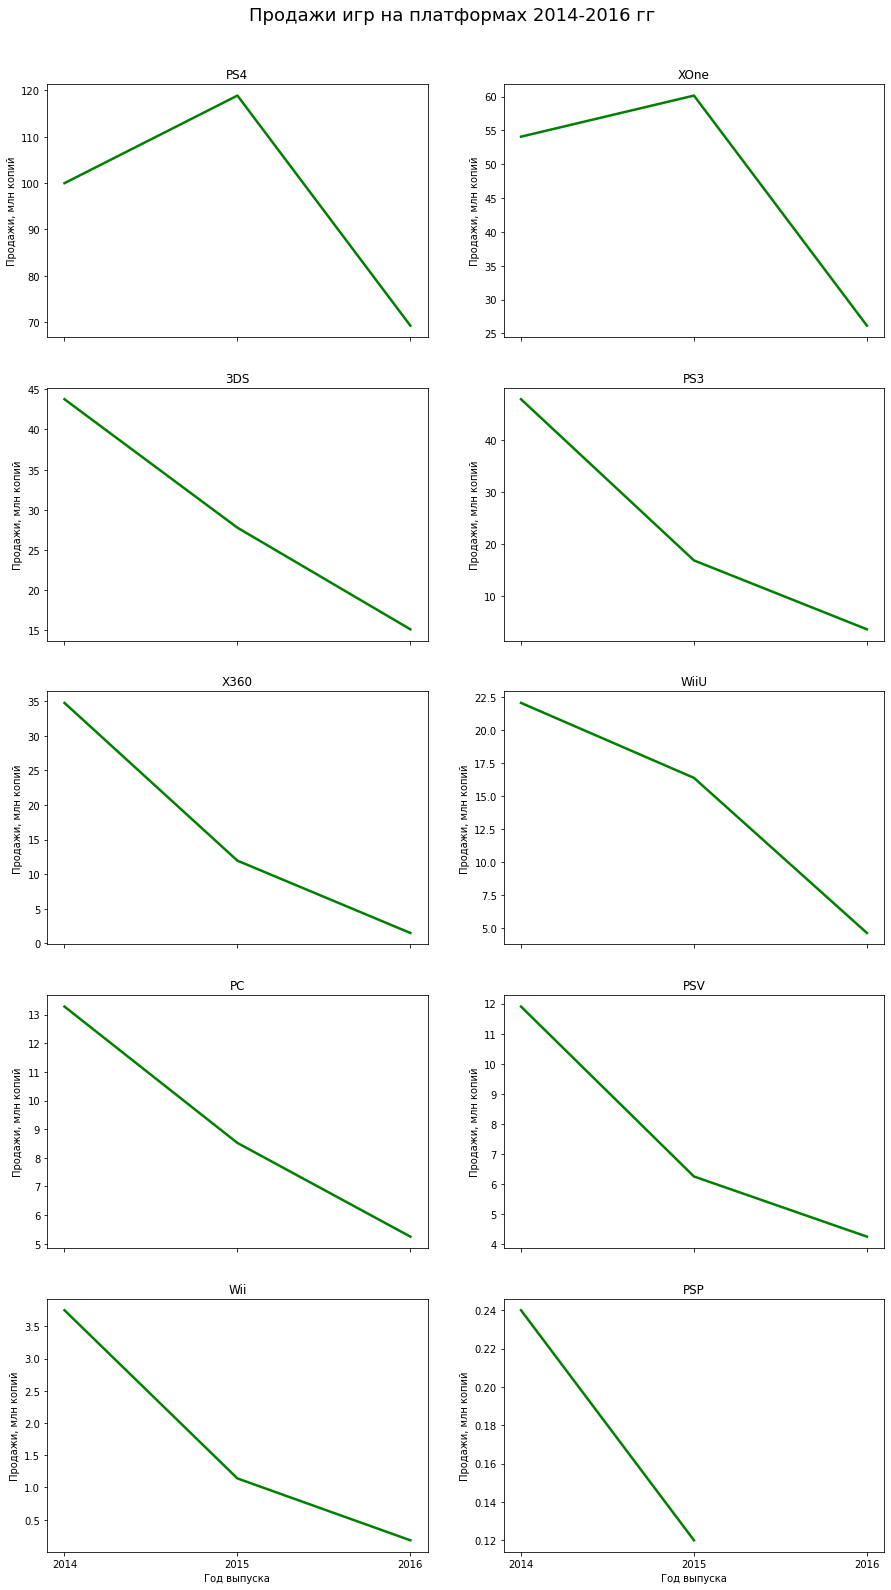

In [47]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 27), sharex = True)
fig.suptitle('Продажи игр на платформaх 2014-2016 гг' , fontsize=18,  y = 0.92)

for platform, ax in zip(pivot_actual_games.platform, axs.ravel()):
    sns.lineplot(data = actual_games.query('platform == @platform').groupby('year_of_release').agg({'overall_sales': 'sum'}), 
                 y = 'overall_sales',
                 x = actual_games.query('platform == @platform').groupby('year_of_release').agg({'overall_sales': 'sum'}).index,
                 ax=ax,
                 linewidth=2.5,
                 color = 'g')
    ax.set_title(platform)
    ax.set_xlabel('Год выпуска')
    ax.set_ylabel('Продажи, млн копий')
    xticks = np.arange(2014, 2017, 1)
    ax.set_xticks(xticks)

Также посмотрим сколько игр выпускалось за актуальный период на платформах из ТОП10:

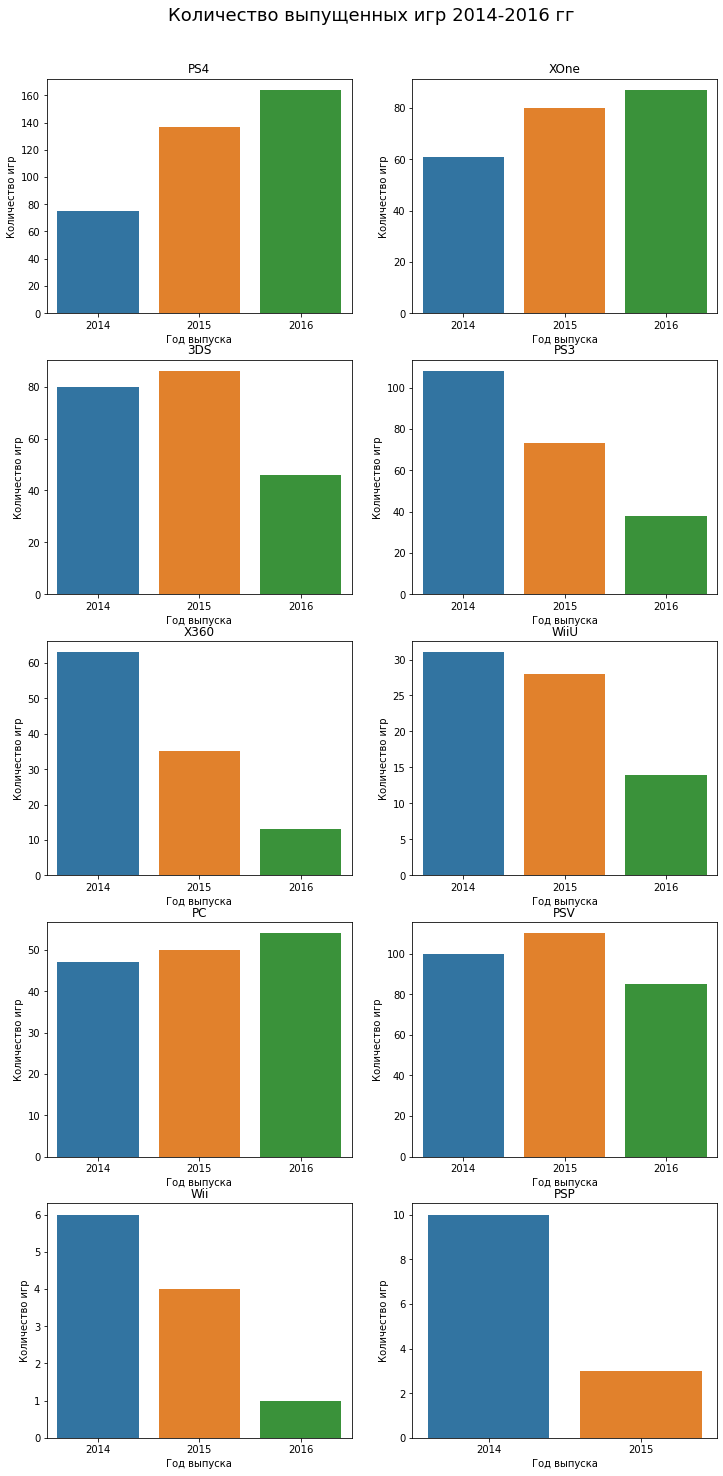

In [48]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 25))
fig.suptitle('Количество выпущенных игр 2014-2016 гг', fontsize=18,  y = 0.92)

for platform, ax in zip(pivot_actual_games.platform, axs.ravel()):
    sns.countplot(data = actual_games[actual_games['platform']==platform], 
                  x = actual_games[actual_games['platform']==platform].year_of_release, ax=ax)
    ax.set_title(platform)
    ax.set_xlabel('Год выпуска')
    ax.set_ylabel('Количество игр')

Из графиков изменения продаж и количества выпускаемых игр можно сделать следующие наблюдения:

- Продажи игр на всех платформах к 2016 году идет на спад. Это, вероятно, связано  с тем, что данные за 2016 год являются неполными. При этом, продажи игр на PS4, XOne только росли до 2016 года и на 2016 г остаются доволно высокими.
- Из топ-10 платформ количество игр всех, кроме PS4,XOne и PC идет на спад. 
- Наиболее перспективными  и соответственно прибыльными играми стоит считать те, у которых к 2016 г сохраняются относительно высокие продажи и растет количество выпускаемых игр.
- **Отберем PS4, XOne и PC как три наиболее перспективные платформы.**

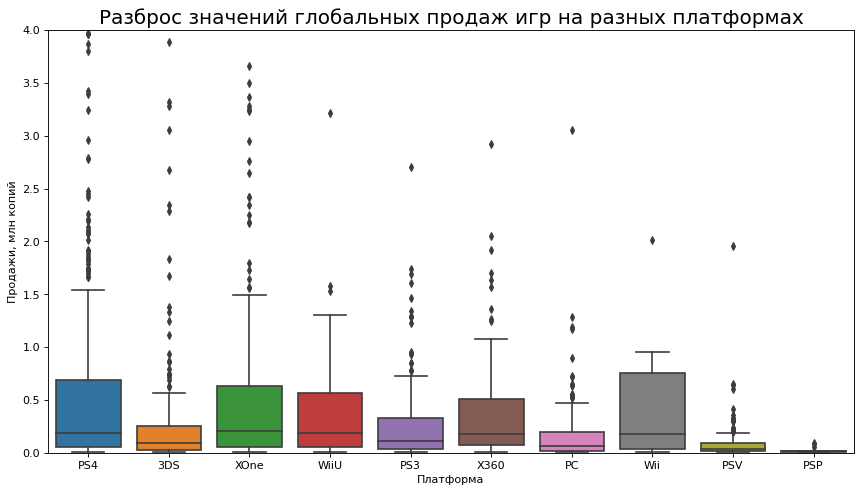

In [49]:
plt.figure(figsize=(13,7), dpi= 80)
sns.boxplot(x='platform', y='overall_sales', data=actual_games, notch=False)
plt.title('Разброс значений глобальных продаж игр на разных платформах', fontsize=18)
plt.ylabel('Продажи, млн копий')
plt.xlabel('Платформа')
plt.ylim(0, 4);

Для  двух избранных платформ - PS4, XOne - большинство значений входит в интервал от 0 до ~ 1.5 млн копий, а медиана составляет около 0,25 млн копий. У остальных платформ большинство продаж входят в несколько меньший интервал, медиана тоже меньше. Однако медиана продаж по платформам WiiU, Wii, X360 близка к PS4, XOne, но как мы видели выше продажи игр на платформах WiiU, Wii, X360
с 2014 года падают.

Практически на всех графиках (кроме PSP и Wii) есть значительное количество выбросов, когда продажи сильно превышали средние значения - это видимо очень популярные игры-хиты. У остальных платформ 5% всех продаж входят в несколько меньший интервал. Например, для PS3 этот интервал слегка меньше единицы 

Таким образом, потенциально прибыльные платформы были выбраны правильно.

#### 3.3 Влияние оценок критиков и пользователей на продажи

**Влияние оценки пользователей**

In [50]:
data_ps4 = actual_games[actual_games.platform == 'PS4']
data_xone = actual_games[actual_games.platform == 'XOne']
data_pc = actual_games[actual_games.platform == 'PC']

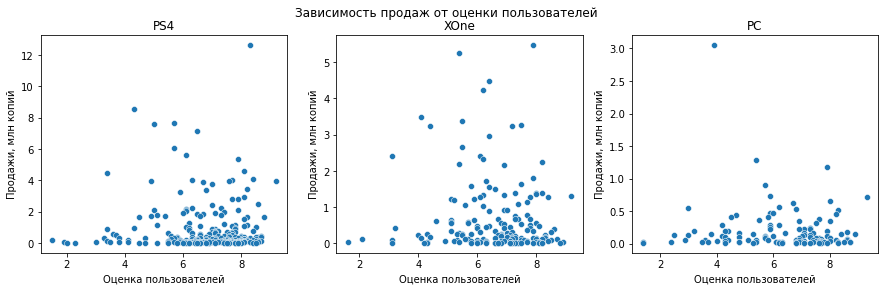

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
fig.suptitle('Зависимость продаж от оценки пользователей')

for platform, ax in zip(['PS4', 'XOne', 'PC'], axs.ravel()):
    sns.scatterplot(data = actual_games[actual_games.platform == platform], x='user_score', y='overall_sales', ax=ax)
    ax.set_title(platform)
    ax.set_ylabel('Продажи, млн копий')
    ax.set_xlabel('Оценка пользователей')

In [52]:
data_ps4.user_score.corr(data_ps4.overall_sales)

-0.04013158947269733

In [53]:
data_xone.user_score.corr(data_xone.overall_sales)

-0.07038392806475809

In [54]:
data_pc.user_score.corr(data_pc.overall_sales)

-0.07159665703472451

*Продажи не зависят от оценки пользователей.*

**Влияние оценки критиков**

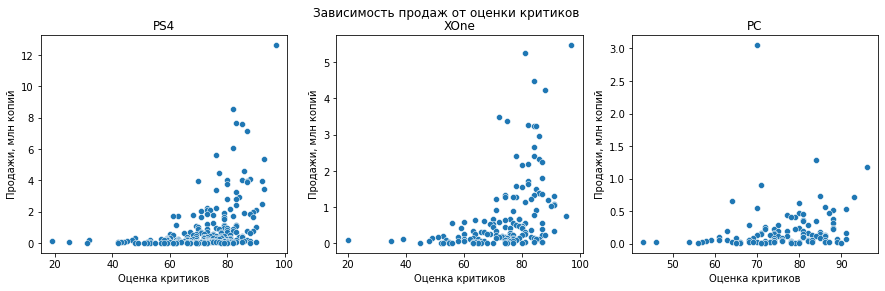

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
fig.suptitle('Зависимость продаж от оценки критиков')

for platform, ax in zip(['PS4', 'XOne', 'PC'], axs.ravel()):
    sns.scatterplot(data = actual_games[actual_games.platform == platform], x='critic_score', y='overall_sales', ax=ax)
    ax.set_title(platform)
    ax.set_ylabel('Продажи, млн копий')
    ax.set_xlabel('Оценка критиков')

In [56]:
data_ps4.critic_score.corr(data_ps4.overall_sales)

0.4026614106810409

In [57]:
data_xone.critic_score.corr(data_xone.overall_sales)

0.42867694370333187

In [58]:
data_pc.critic_score.corr(data_pc.overall_sales)

0.17463413769350036

*Для игр на PS4 и XOne есть средняя по силе положительная зависимость продаж от оценки критиков. Для игр на PC положительная зависимость тоже есть, но более слабая.*

**Таким образом,** есть следующая общая закономерность : чем выше оценка критиков, тем выше продажи игры.

#### 3.4 Распределение по жанрам

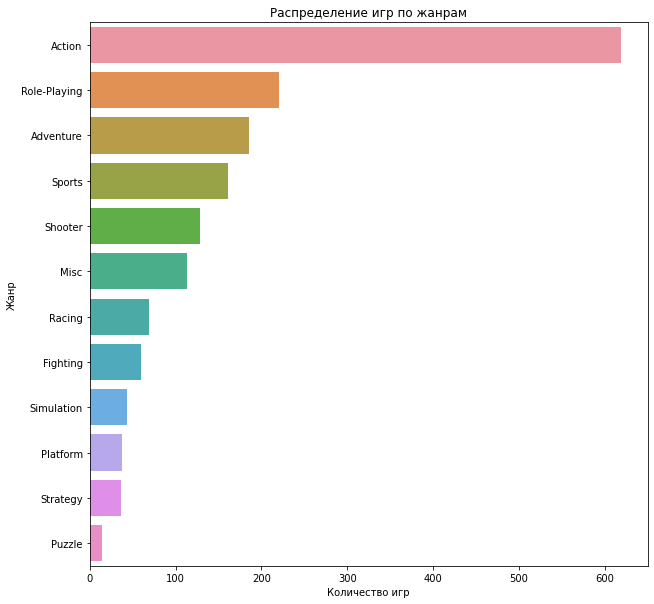

In [59]:
plt.figure(figsize = (10,10))
sns.countplot(data = actual_games, y = actual_games.genre, order = actual_games.genre.value_counts().index)
plt.title('Распределение игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр');

Больше всего среди игр 2014-2016 гг игр в жанре экшн - более 600. Далее идут ролевые, приключенческие спортивные игры и шутеры.

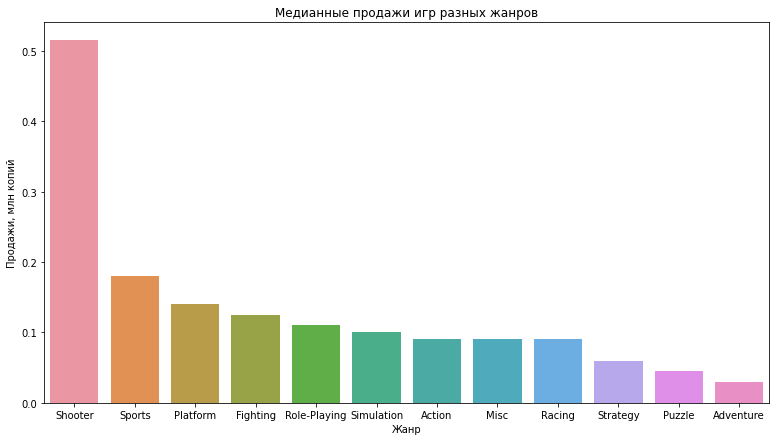

In [60]:
pivot_genre = actual_games.pivot_table(index = 'genre', values = 'overall_sales', aggfunc = 'median').reset_index().sort_values(by='overall_sales', ascending = False)
plt.figure(figsize = (13,7))
sns.barplot(data = pivot_genre, x=pivot_genre.genre, y = pivot_genre.overall_sales)
plt.title('Медианные продажи игр разных жанров')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий');

Самый прибыльный жанр в 2014-2016 гг с большим отрывом от остальных - шутеры. Далее по продажам идут жанры спорт, платформеры, fighting, ролевые игры и другие.

Самые низкие продажи у приключений, головоломок и стратегий.

#### 3.5 Вывод

- За 10 лет происходит цикл "жизни" игровой платформы от развития популярности до спада.


- **Наиболее актуальными для прогнозирования являются данные за 2014-2016 гг** согласно изменению продаж игр по годам. В настоящее время индустрия игр динамично меняется, анализировать более ранние даные не имеет смысла, т.к. платформы быстро устаревают и стремительно появляются новые. Проанализировав данные за последние три года, мы сможем найти платформы, находящиеся на пике популярности в настоящий момент и правильно определить потенциально прибыльные игры.


- Определили ТОП10 наиболее прибыльных платформ в 2014-2016 гг, исследовали изменение годовых продаж по каждой из ТОП10 платформе и сопоставили эти данные с количеством выпускаемых игр в год. На основании полученных закономерностей, определили, что наиболее персперктивными платформами являются **PS4, XOne и PC**.


- Показали, что продажи игр не зависят от оценок пользователей, но зависят от оценок критиков. Чем выше оценка критиков, тем больше продаж у игры.


- Больше всего среди игр 2014-2016 гг игр в жанре экшн - более 600. Далее идут ролевые, приключенческие, спортивные игры и шутеры. 


- Самый прибыльный жанр в 2014-2016 гг с большим отрывом от остальных - шутеры. Далее по продажам идут жанры спорт, платформеры, fighting, ролевые игры и другие. Самые низкие продажи у приключений, головоломок и стратегий.

### 4. Портрет пользователя региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### 4.1 популярные платформы

a. Япония

In [61]:
def barplot_region(column, region_sales):
    pivot_column = actual_games.pivot_table(index = column, values = region_sales , aggfunc = 'sum', margins= True)
    all_sales = pivot_column[pivot_column.index=='All'][region_sales].iloc[0]
    pivot_column['sales_share'] = pivot_column[region_sales]/all_sales
    to_plot = pivot_column.sort_values(by=region_sales, ascending = False).drop('All', axis =0).head()
    ax = sns.barplot(data = to_plot, y='sales_share', x = to_plot.index)
    ax.set_ylabel('Доля продаж')
    for i, v in enumerate(round(to_plot.sales_share, 2)):
        ax.text(i, v , str(v), ha='center')

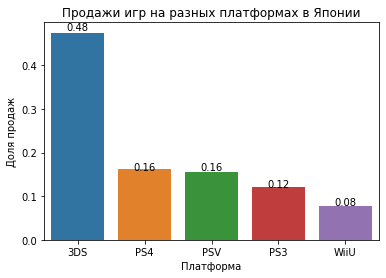

In [62]:
barplot_region('platform','jp_sales')
plt.title('Продажи игр на разных платформах в Японии')
plt.xlabel('Платформа');

Самые популярные платформы в Японии nintendo 3DS - ее доля продаж составляет почти 50% . Далее примерно с одинаковой долей PS4 и PSV (по 16% от всех продаж). Далее по популярности - PS3 и WiiU ,  c долей продаж 12 и 8 %.

b. Европа

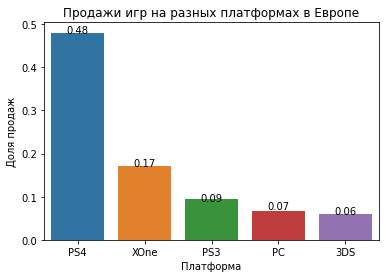

In [63]:
barplot_region('platform','eu_sales')
plt.title('Продажи игр на разных платформах в Европе')
plt.xlabel('Платформа');

В Европе наиболее популярны игры на PS4 (48% продаж региона), XOne (17%), PS3 (9%). Далее идут игры на платформах PC и 3DS.

c. Северная Америка

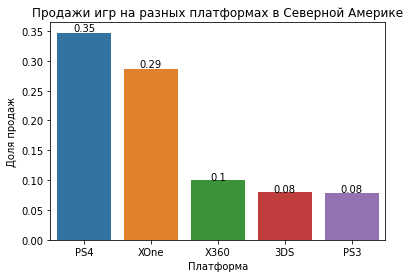

In [64]:
barplot_region('platform','na_sales')
plt.title('Продажи игр на разных платформах в Северной Америке')
plt.xlabel('Платформа');

В Северной Америке наиболее популярны игры на PS4 (35% продаж региона), XOne (29%), X360 (10%), PS3 (8%).

Если сравнивать три региона, то Япония отличается от остальных сильнее всех. Там наиболее популярны игры на nintendo 3DS. В Европе и в северной Америке в ТОП-2 составляют одни и те же платформы - PS4 и XOne. 

#### 4.2 популярные жанры

a. Япония

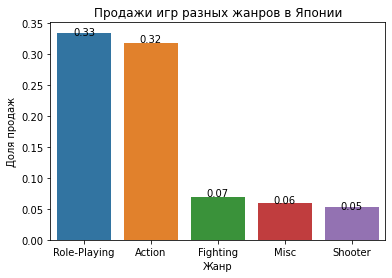

In [65]:
barplot_region('genre','jp_sales')
plt.title('Продажи игр разных жанров в Японии')
plt.xlabel('Жанр');

Наиболее популярные жанры компьютерных игр в Японии - ролевые, экшн.

b. Европа

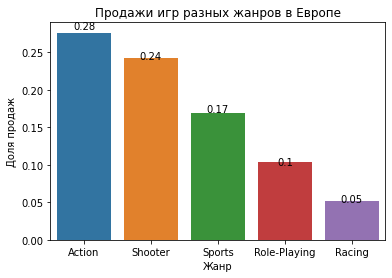

In [66]:
barplot_region('genre','eu_sales')
plt.title('Продажи игр разных жанров в Европе')
plt.xlabel('Жанр');

Наиболее популярные жанры компьютерных игр в Европе - экшн и шутеры.

с. Северная Америка

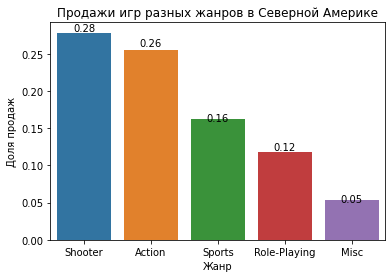

In [67]:
barplot_region('genre','na_sales')
plt.title('Продажи игр разных жанров в Северной Америке')
plt.xlabel('Жанр');

Наиболее популярные жанры компьютерных игр в Северной Америке - шутеры и экшн. Почти как в Европе, но шутеры в этот раз популярнее.

Таким образом, Япония снова сильно отличается от Западных стран по популярным жанрам игр. Любимый жанр японцев - ролевые игры, тогда как у стран Запада ролевые игры на 4 месте. 

На втором месте - экшн. Экшн - самый популярный жанр в странах Европы и второй по популярности в Северной Америки. 

Вкусы к жанрам видеоигр у жителей Европы и Северной Америки практически совпадают - ТОП4 сходится почти полностью, исключение - в Северной Америке шутеры любят чуть больше чем экшн, в Европе наоборот. 

#### 4.3 Влияние рейтинга ESRB на продажи


Заполним пропуски в рейтинге значением unknown.

In [68]:
actual_games['rating'] = actual_games.rating.fillna('unknown')

a. Япония

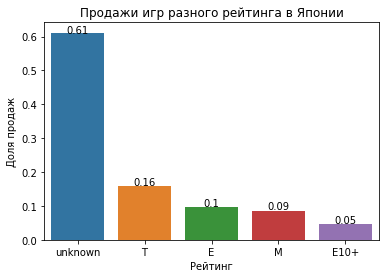

In [69]:
barplot_region('rating','jp_sales')
plt.title('Продажи игр разного рейтинга в Японии')
plt.xlabel('Рейтинг');


b. Европа

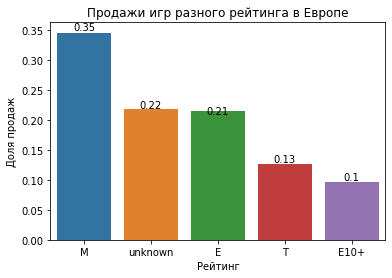

In [70]:
barplot_region('rating','eu_sales')
plt.title('Продажи игр разного рейтинга в Европе')
plt.xlabel('Рейтинг');

с. Северная Америка

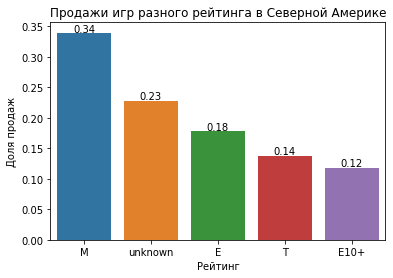

In [71]:
barplot_region('rating','na_sales')
plt.title('Продажи игр разного рейтинга в Северной Америке')
plt.xlabel('Рейтинг');

На графиках видно, что значительную часть занимают игры без рейтинга. В Японии таких игр больше половины от проданных, а в Европе и Северной Америке почти четверть всех продаж. 

Вероятно, в Японии так много игр без рейтинга, потому что многие игры локальные и по западному рейтингу ESRB не оцениваются. В Японии есть свой рейтинг - CERO. В западных странах тоже есть такие локальные и не очень популярные игры, которым не присвоен рейтинг.


Если пренебречь играми без рейтинга, то:
- Продажи глобально зависят от рейтинга;
- В Северной Америке и Европе зависимость очень похожа, больше всего продаются игр с рейтингом M - для взрослых (17+).
- В Японии больше всего продаж игр для подростков, однако, если бы пропусков в рейтинге не было, не факт,что это было бы так.


#### 4.4 Вывод

- Портрет пользователя видеоигр в Японии наиболее отличителен, что связано с локальной модой и культурными особенностями. Среди японцев наиболее популярны игры на nintendo 3DS, а среди жанров - ролевые и экшн игры.

- Вкусы к жанрам видеоигр у жителей Европы и Северной Америки практически совпадают: ТОП4 сходится почти полностью. Исключение - в Северной Америке шутеры любят чуть больше, чем экшн, в Европе - наоборот. Препочтения по платформам тоже похожи: в ТОП-2 входят  одни и те же платформы - PS4 и XOne. 

- В данных довольно много игр без рейтинга ESRB, особенно в Японии, это может связано с тем, что ESRB рейтинг - рейтинг для игр, распространенных в Северной Америке. 
- В целом, продажи зависят от рейтинга. В Северной Америке и Европе зависимость очень похожа, больше всего продаются игр с рейтингом M - для взрослых (17+). В Японии больше всего продаж игр для подростков.

### 5. Проверка гипотез

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чтобы сравнить средние пользовательские рейтинги двух платформ необходимо применить тест Стьюдента для проверки гипотезы о равенстве средних двух генеральных совокупностей. 

За нулевую гипотезу возьмем утверждение, что средние пользовательские рейтинги Xbox One и PC **равны.**

Альтернативной гипотезой будет утверждение, что средние пользовательские рейтинги Xbox One и PC **неравны.**

In [72]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(actual_games.query('platform == "XOne"').user_score, 
                       actual_games.query('platform == "PC"').user_score, nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348513
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу. Значит, с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

Здесь тоже воспользуемся Т-тестом для проверки гипотезы о равенстве средних двух генеральных совокупностей. 

За нулевую гипотезу возьмем утверждение, что средние пользовательские рейтинги жанров  Action и Sports **равны.**

Альтернативной гипотезой будет утверждение, что средние пользовательские рейтинги жанров  Action и Sports **неравны.**

In [73]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(actual_games.query('genre == "Action"').user_score, 
                       actual_games.query('genre == "Sports"').user_score, nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985107304e-19
Отвергаем нулевую гипотезу


P-value сильно меньше уровня значимости, поэтому отвергаем нулевую гипотезу. Значит средние пользовательские рейтинги жанров  Action и Sports **неравны** (при уровне значимости 0.05).

#### 5.3 Вывод

- Средние пользовательские рейтинги Xbox One и PC с большой долей вероятности не имеют статистически значимых отличий.
- Средние пользовательские рейтинги жанров  Action и Sports неравны.

### 6. Общий вывод

*1. Обзор данных*

Данные представлены в одной таблице. В таблице 16715 записей, 11 столбцов (7 из которых с численными данными) с информацией об играх, выпущенных с 1980 по 2016 гг. В данных есть пропуски. Некорректно проименованы столбцы (не соотвествуют общепринятому стилю).
Для значений года выходы игры и оценки пользователей необходимо изменить тип данных на целочисленный и вещественные числа соответственно.


*2. Предобработка данных*

 - Изменили названия столбцов на соответсвующие общепринятому стилю.
 - Удалили записи с пропусками в `year_of_release`, `name` и `genre` (менее 2% записей). Остальные пропуски оставили, их много, не можем просто убрать или заменить на медианы, потому что это возможно приведет к искажению данных и дальнейших результатов. Причиной пропусков может быть некорректная работа алгоритмов выгрузки данных, что следует сообщить разработчикам, а также отсутсвие тех или иных данных в первоисточнике.
 - Значения в колонке `user_score` преобразовали в тип float, в колонке `year_of_release` в тип int.
 - В колонке с оценкой пользователей кроме пропусков и численных значений, присутвует значение 'tbd' - to be determined, оно обозначает, что оценка пользователей еще не сформировалась, в нашем случае это равноценно пропуску.
 - В отдельный столбец `overall_sales` занесли данные о суммарных продажах игры.
 - Проверили на дубликаты: полных дубликатов не было, был один дубликат в подстроке с названием игры, годом выпуска и платформой, его удалили.
 
*3. Исследовательский анализ данных*

- За 10 лет происходит цикл "жизни" игровой платформы от развития популярности до спада.

- **Наиболее актуальными для прогнозирования являются данные за 2014-2016 гг** согласно изменению продаж игр по годам. В настоящее время индустрия игр динамично меняется, анализировать более ранние данные не имеет смысла, т.к. платформы быстро устаревают и стремительно появляются новые. 

- Определили ТОП10 наиболее прибыльных платформ в 2014-2016 гг, исследовали изменение годовых продаж по каждой из ТОП10 платформе и сопоставили эти данные с количеством выпускаемых игр в год. На основании полученных закономерностей, определили, что наиболее персперктивными платформами являются **PS4, XOne и PC**.

- Показали, что продажи игр не зависят от оценок пользователей, но зависят от оценок критиков. Чем выше оценка критиков, тем больше продаж у игры.

- Больше всего среди игр 2014-2016 гг игр в жанре экшн - более 600. Далее идут ролевые, приключенческие, спортивные игры и шутеры. 

- Самый прибыльный жанр в 2014-2016 гг с большим отрывом от остальных - шутеры. Далее по продажам идут жанры спорт, платформеры, fighting, ролевые игры и другие. Самые низкие продажи у приключений, головоломок и стратегий.


*4. Портрет пользователя региона*

- Портрет пользователя видеоигр в Японии наиболее отличителен, что связано с локальной модой и культурными особенностями. Среди японцев наиболее популярны игры на nintendo 3DS, а среди жанров - ролевые и экшн игры.

- Вкусы к жанрам видеоигр у жителей Европы и Северной Америки практически совпадают: ТОП4 сходится почти полностью. Исключение - в Северной Америке шутеры любят чуть больше, чем экшн, в Европе - наоборот. Препочтения по платформам тоже похожи: в ТОП-2 входят  одни и те же платформы - PS4 и XOne. 

- В данных довольно много игр без рейтинга ESRB, особенно в Японии, это может связано с тем, что ESRB рейтинг - рейтинг для игр, распространенных в Северной Америке. 
- В целом, продажи зависят от рейтинга. В Северной Америке и Европе зависимость очень похожа, больше всего продаются игр с рейтингом M - для взрослых (17+). В Японии больше всего продаж игр для подростков.

*5. Проверка гипотез*

С помощью Т- теста проверили гипотезы о равенстве средних пользовательских оценок платформ Xbox One и PC, жанров Action и Sports.
- Средние пользовательские рейтинги Xbox One и PC с большой долей вероятности не имеют статистически значимых отличий.
- Средние пользовательские рейтинги жанров  Action и Sports неравны.

**Таким образом,** потенциально популярный продукт - это шутеры, экшн и спортивные игры на платформах PS4, XOne и PC с рейтингом 17+. 
Такой продукт будет популярен в Европе и Северной Америке. 

Для продукта потенциально наиболее популярного в Японии есть смысл выбрать ролевые и экшн игры на nintendo 3DS и PS4.